In [1]:
# import necesarry modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [2]:
# import the dataset
bike_sharing = pd.read_csv('./bike_sharing.csv')
bike_sharing.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [3]:
# information of the dataset
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hr                      1488 non-null   int64  
 1   holiday                 1488 non-null   int64  
 2   workingday              1488 non-null   int64  
 3   temp                    1488 non-null   float64
 4   hum                     1488 non-null   float64
 5   windspeed               1488 non-null   float64
 6   cnt                     1488 non-null   int64  
 7   instant                 1488 non-null   int64  
 8   mnth                    1488 non-null   int64  
 9   yr                      1488 non-null   int64  
 10  Clear to partly cloudy  1488 non-null   int64  
 11  Light Precipitation     1488 non-null   int64  
 12  Misty                   1488 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 151.2 KB


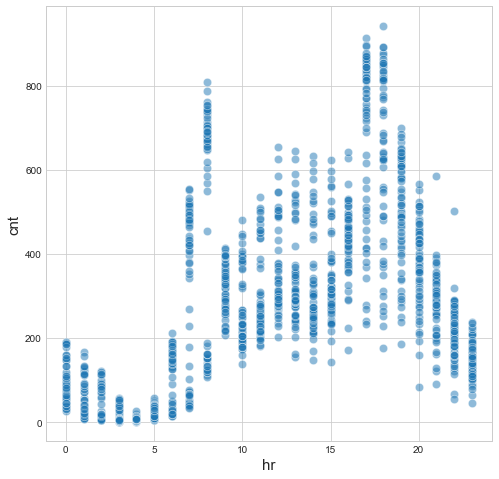

In [5]:
# plot bike_sharing dataset in 2D
plt.figure(figsize = [8, 8])
sns.scatterplot(x = 'hr',
                y = 'cnt',
                data = bike_sharing,
                markers = '.',
                alpha = 0.5,
                s = 70)
plt.xlabel('hr', size = 15)
plt.ylabel('cnt', size = 15)

plt.show()

In [6]:
# Create feature and target arrays
X = bike_sharing[['hr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'instant', 'mnth', 'yr', 'Clear to partly cloudy', 'Light Precipitation', 'Misty']]
y = bike_sharing[['cnt']]
data = [X, y]
data[0].head()

,hr,holiday,workingday,temp,hum,windspeed,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,13008,7,1,1,0,0


In [7]:
# basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# splot dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 2)


In [8]:
# instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators = 25,
                           random_state = 2)

# fit rf to the training set
rf.fit(X_train, y_train)

# predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

# evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred) ** (1/2)

# print the test set RMSE
print('Test set RMSE of rf: {:.3f}'.format(rmse_test))

Test set RMSE of rf: 54.491


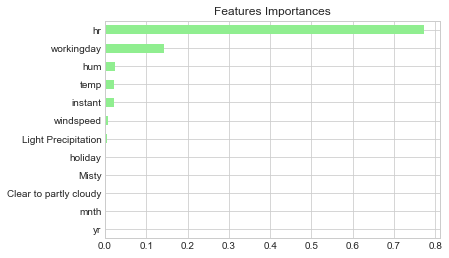

In [10]:
# create a pd.Series of features importances
importances = pd.Series(data = rf.feature_importances_,
                        index = X_train.columns)

# sort importances_rf
importances_sorted = importances.sort_values()

# make a horizontal bar plot
importances_sorted.plot(kind = 'barh', color = 'lightgreen')
plt.title('Features Importances')
plt.show()